# Pandemic shocks and fiscal-monetary policies in the Eurozone: "COVID Dominance" during January - June 2020

In [1]:
print('Python libraries and Thomson Reuters EIKON API')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.image as mpimg
import seaborn as sbn
import io
import requests
import warnings
warnings.filterwarnings("ignore")
from io import BytesIO
from pandas_datareader.data import DataReader
import eikon as ek
ek.set_app_id('a33a8266552844e690837f10d95fec73f831e549')
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.display import display as pydisplay
from cycler import cycler
color_c = cycler('color', ['k'])
style_c = cycler('linestyle', ['-', '--', ':', '-.'])
markr_c = cycler('marker', ['', '.', 'o','x','+','*'])
c_cms = color_c * markr_c * style_c
c_csm = color_c * style_c * markr_c
from datetime import datetime
pd.to_datetime('today')

Python libraries and Thomson Reuters EIKON API


Timestamp('2020-06-22 09:53:46.766348')

__Full List of EZ Countries__<br>

'AT','BE','CY','EE','FI','FR','DE','GR','IE','IT','LV','LT','LU','MT','NL','PT','SK','SI','ES'

## Figure 1

In [2]:
print('10-year CDS, daily')
slist = ('ATGV10YUSAC=MG','BEGV10YUSAC=MG','CYGV10YUSAC=MG','FIGV10YUSAC=MG','FRGV10YUSAC=MG','DEGV10YUSAC=MG','GRGV10YUSAC=MG',
         'IEGV10YUSAC=MG','ITGV10YUSAC=MG','LTGV10YUSAC=MG','NLGV10YUSAC=MG','PTGV10YUSAC=MG','SKGV10YUSAC=MG',
         'SIGV10YUSAC=MG','ESGV10YUSAC=MG','LVGV10YUSAC=MG')
s = pd.DataFrame()
for i in slist:
    dat = ek.get_timeseries([i], fields="CLOSE", start_date = "2000-01-01", end_date = "2020-06-15", interval="daily")
    dat.rename(columns={'CLOSE':i[0:2]},inplace=True)
    s = s.merge(dat, left_index=True, right_index=True, how='outer')
s.index = s.index.to_period('D')
print('CDS 10-Year')
s.to_csv('_CDS10Ydaily.csv')

10-year CDS, daily
CDS 10-Year


In [3]:
print('5-year CDS, daily')
slist = ('ATGV5YUSAC=MG','BEGV5YUSAC=MG','CYGV5YUSAC=MG','FIGV5YUSAC=MG','FRGV5YUSAC=MG','DEGV5YUSAC=MG','GRGV5YUSAC=MG',
         'IEGV5YUSAC=MG','ITGV5YUSAC=MG','LTGV5YUSAC=MG','NLGV5YUSAC=MG','PTGV5YUSAC=MG','SKGV5YUSAC=MG',
         'SIGV5YUSAC=MG','ESGV5YUSAC=MG','LVGV5YUSAC=MG')
s = pd.DataFrame()
for i in slist:
    dat = ek.get_timeseries([i], fields="CLOSE", start_date = "2000-01-01", end_date = "2020-06-15", interval="daily")
    dat.rename(columns={'CLOSE':i[0:2]},inplace=True)
    s = s.merge(dat, left_index=True, right_index=True, how='outer')
s.index = s.index.to_period('D')
print('CDS 5-Year')
s.to_csv('_CDS5Ydaily.csv')
sDE = s.copy()

5-year CDS, daily
CDS 5-Year


In [4]:
print('5-year CDS, quarterly')
slist = ('ATGV5YUSAC=MG','BEGV5YUSAC=MG','CYGV5YUSAC=MG','FIGV5YUSAC=MG','FRGV5YUSAC=MG','DEGV5YUSAC=MG','GRGV5YUSAC=MG',
         'IEGV5YUSAC=MG','ITGV5YUSAC=MG','LTGV5YUSAC=MG','NLGV5YUSAC=MG','PTGV5YUSAC=MG','SKGV5YUSAC=MG',
         'SIGV5YUSAC=MG','ESGV5YUSAC=MG','LVGV5YUSAC=MG')
s = pd.DataFrame()
for i in slist:
    dat = ek.get_timeseries([i], fields="CLOSE", start_date = "2000-01", end_date = "2020-06", interval="quarterly")
    dat.rename(columns={'CLOSE':i[0:2]},inplace=True)
    s = s.merge(dat, left_index=True, right_index=True, how='outer')
s.index = s.index.to_period('Q')
print('CDS 5-Year')
s.to_csv('_CDS5Yquarterly.csv')

5-year CDS, quarterly
CDS 5-Year


In [5]:
sDE = s.copy()
sDE[['AT','BE','CY','FI','FR','GR','IE','IT','LT','NL','PT','SK','SI','ES','LV']] = \
    s[['AT','BE','CY','FI','FR','GR','IE','IT','LT','NL','PT','SK','SI','ES','LV']].sub(s['DE'], axis=0); 
sDE.to_csv('_CDS5YSpreadOverGermanyQuarterly.csv')


print('Plot CDS')
def Figure_1a():
    Figure_1a = plt.figure(figsize=(20,10))
    plt.rc('axes', prop_cycle=c_cms)
    sDE[['AT','BE','CY','FI','FR','GR','IE','IT','LT','NL','PT','SK','SI','ES']].plot(figsize=(20,10))
    plt.subplots_adjust(top=0.93)
    #plt.suptitle('Figure 1a. Sovereign 5-Year CDS Spreads over Germany',fontsize=25)
    #txt = 'Note: Quarterly data from Markit; Thomson Reuters Refinitiv (Eikon API).'
    #plt.text(174,-500,txt, ha='center',fontsize=20)
    plt.xlim(['2010Q1', '2020Q2'])
    plt.xlabel('')
    plt.grid()
    plt.savefig('Figure_1a.png', format='png')
    plt.show()

Plot CDS


<Figure size 1440x720 with 0 Axes>

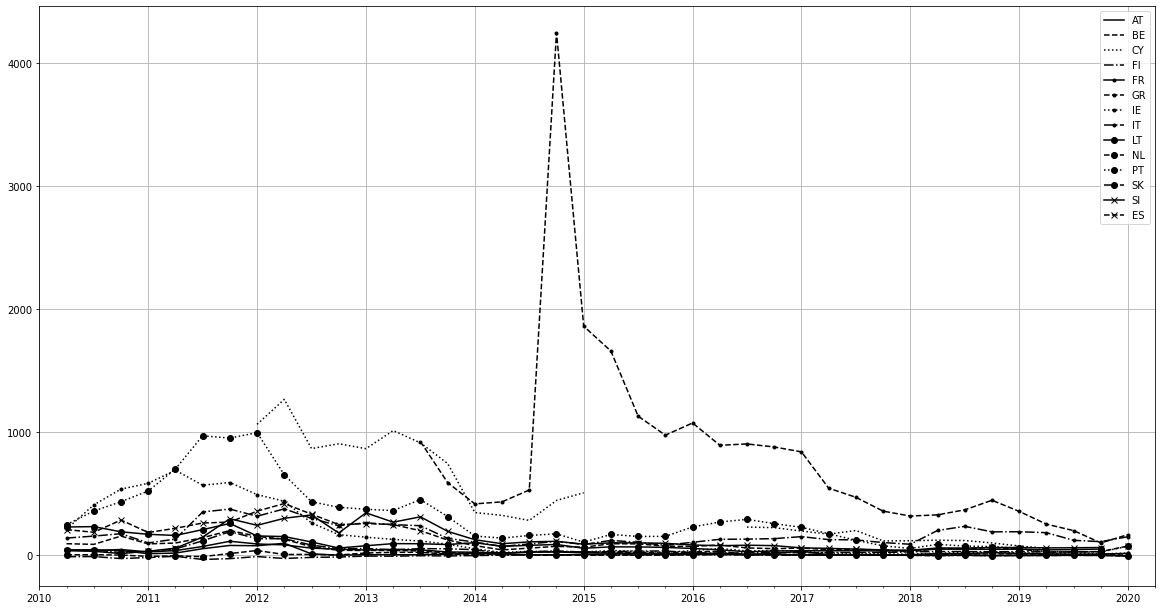

In [6]:
Figure_1a()

In [7]:
print('10-year government bond yields, daily')
i10list = ('AT10YT=RR','BE10YT=RR','CY10YT=RR','FI10YT=RR','FR10YT=RR','DE10YT=RR','GR10YT=RR','IE10YT=RR','IT10YT=RR',
           'LT10YT=RR','MT10YT=RR','NL10YT=RR','PT10YT=RR','SK10YT=RR','SI10YT=RR','ES10YT=RR','US10YT=RR')
i10 = pd.DataFrame()
for i in i10list:
    dat = ek.get_timeseries([i], fields="CLOSE", start_date = "2000-01-01", end_date = "2020-06-15", interval="daily")
    dat.rename(columns={'CLOSE':i[0:2]},inplace=True)
    i10 = i10.merge(dat, left_index=True, right_index=True, how='outer')
i10.index = i10.index.to_period('D')
print('Spreads over 10-year DE yields')
i10.to_csv('_Yield10YearDaily.csv')

10-year government bond yields, daily
Spreads over 10-year DE yields


In [8]:
print('10-year government bond yields, monthly')
i10list = ('AT10YT=RR','BE10YT=RR','CY10YT=RR','FI10YT=RR','FR10YT=RR','DE10YT=RR','GR10YT=RR','IE10YT=RR','IT10YT=RR',
           'LT10YT=RR','MT10YT=RR','NL10YT=RR','PT10YT=RR','SK10YT=RR','SI10YT=RR','ES10YT=RR','US10YT=RR')
i10 = pd.DataFrame()
for i in i10list:
    dat = ek.get_timeseries([i], fields="CLOSE", start_date = "2000-01", end_date = "2020-06", interval="monthly")
    dat.rename(columns={'CLOSE':i[0:2]},inplace=True)
    i10 = i10.merge(dat, left_index=True, right_index=True, how='outer')
i10.index = i10.index.to_period('M')
print('Spreads over 10-year DE yields')
i10.to_csv('_Yield10YearMonthly.csv')

10-year government bond yields, monthly
Spreads over 10-year DE yields


In [9]:
print('10-year government bond yields, quarterly')
i10list = ('AT10YT=RR','BE10YT=RR','CY10YT=RR','FI10YT=RR','FR10YT=RR','DE10YT=RR','GR10YT=RR','IE10YT=RR','IT10YT=RR',
           'LT10YT=RR','MT10YT=RR','NL10YT=RR','PT10YT=RR','SK10YT=RR','SI10YT=RR','ES10YT=RR','US10YT=RR')
i10 = pd.DataFrame()
for i in i10list:
    dat = ek.get_timeseries([i], fields="CLOSE", start_date = "2000-01", end_date = "2020-06", interval="quarterly")
    dat.rename(columns={'CLOSE':i[0:2]},inplace=True)
    i10 = i10.merge(dat, left_index=True, right_index=True, how='outer')
i10.index = i10.index.to_period('Q')
print('Spreads over 10-year DE yields')
i10.to_csv('_Yield10YearQuarterly.csv')

10-year government bond yields, quarterly
Spreads over 10-year DE yields


In [10]:
iDE = i10.copy()
iDE[['AT','BE','CY','FI','FR','GR','IE','IT','LT','MT','NL','PT','SK','SI','ES']] = \
    i10[['AT','BE','CY','FI','FR','GR','IE','IT','LT','MT','NL','PT','SK','SI','ES']].sub(i10['DE'], axis=0); 
iDE.to_csv('_YieldSpreadOverDE10y.csv')

print('Plot interest rates')
def Figure_1b():
    Figure_1b = plt.figure(figsize=(20,10))
    plt.rc('axes', prop_cycle=c_cms)
    iDE[['AT','BE','CY','FI','FR','GR','IE','IT','LT','MT','NL','PT','SK','SI','ES']].plot(figsize=(20,10))
    plt.subplots_adjust(top=0.93)
    #plt.suptitle('Figure 1b. Government Bond Yield Spreads over 10-Year Germany Yields',fontsize=25)
    #txt = 'Note: Quarterly data from Thomson Reuters Refinitiv (Eikon API).'
    #plt.text(145,-8,txt, ha='center',fontsize=20)
    plt.xlim(['2000Q1', '2020Q2'])
    plt.xlabel('')
    plt.grid()
    plt.savefig('Figure_1b.png', format='png')
    plt.show()

Plot interest rates


<Figure size 1440x720 with 0 Axes>

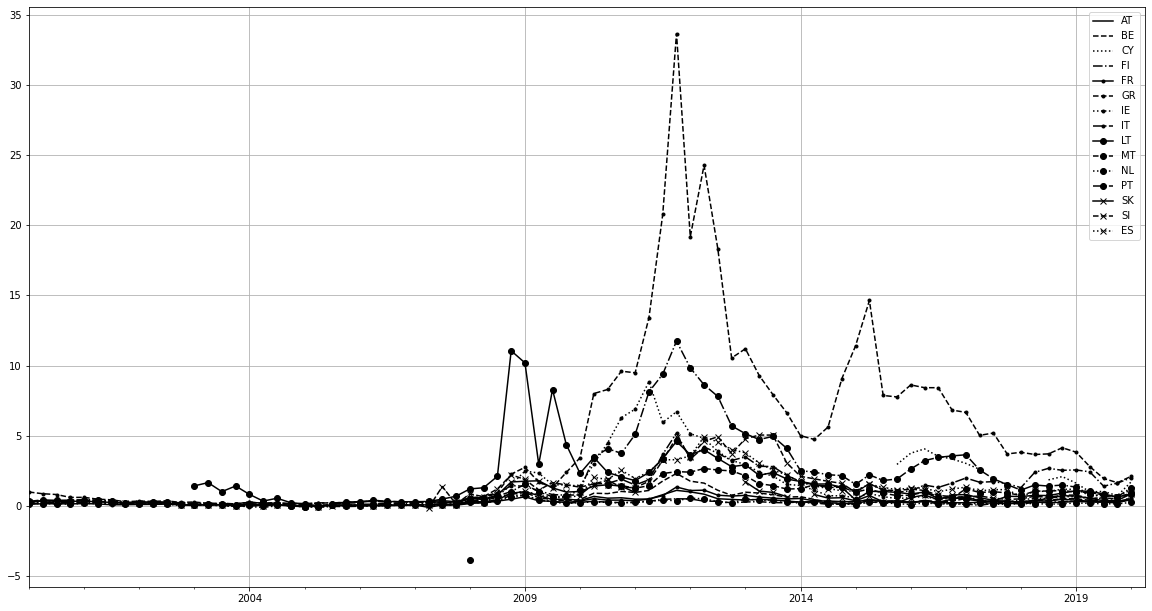

In [11]:
Figure_1b()

real GDP growth: aATCGDPYD/A; % year on year, Standardized, SA, Chg Y/Y, quarterly, constant prices, seasonally adjusted

In [12]:
print('1-year government bond yields, daily')
i01list = ('AT1YT=RR','BE1YT=RR','CY1YT=RR','FR1YT=RR','DE1YT=RR','GR1YT=RR','IE1YT=RR','IT1YT=RR','LT1YT=RR',
           'MT1YT=RR','NL1YT=RR','PT1YT=RR','SK1YT=RR','SI1YT=RR','ES1YT=RR','US1YT=RR')
i01 = pd.DataFrame()
for i in i01list:
    dat = ek.get_timeseries([i], fields="CLOSE", start_date = "2000-01-01", end_date = "2020-06-15", interval="daily")
    dat.rename(columns={'CLOSE':i[0:2]},inplace=True)
    i01 = i01.merge(dat, left_index=True, right_index=True, how='outer')
i01.index = i01.index.to_period('D')
i01.to_csv('_Yield01YearDaily.csv')

1-year government bond yields, daily


In [13]:
print('1-year government bond yields, monthly')
i01list = ('AT1YT=RR','BE1YT=RR','CY1YT=RR','FR1YT=RR','DE1YT=RR','GR1YT=RR','IE1YT=RR','IT1YT=RR','LT1YT=RR',
           'MT1YT=RR','NL1YT=RR','PT1YT=RR','SK1YT=RR','SI1YT=RR','ES1YT=RR','US1YT=RR')
i01 = pd.DataFrame()
for i in i01list:
    dat = ek.get_timeseries([i], fields="CLOSE", start_date = "2000-01", end_date = "2020-06", interval="monthly")
    dat.rename(columns={'CLOSE':i[0:2]},inplace=True)
    i01 = i01.merge(dat, left_index=True, right_index=True, how='outer')
i01.index = i01.index.to_period('M')
i01.to_csv('_Yield01YearMonthly.csv')

1-year government bond yields, monthly


In [14]:
print('1-year government bond yields, quarterly')
i01list = ('AT1YT=RR','BE1YT=RR','CY1YT=RR','FR1YT=RR','DE1YT=RR','GR1YT=RR','IE1YT=RR','IT1YT=RR','LT1YT=RR',
           'MT1YT=RR','NL1YT=RR','PT1YT=RR','SK1YT=RR','SI1YT=RR','ES1YT=RR','US1YT=RR')
i01 = pd.DataFrame()
for i in i01list:
    dat = ek.get_timeseries([i], fields="CLOSE", start_date = "2000-01", end_date = "2020-06", interval="quarterly")
    dat.rename(columns={'CLOSE':i[0:2]},inplace=True)
    i01 = i01.merge(dat, left_index=True, right_index=True, how='outer')
i01.index = i01.index.to_period('Q')
i01.to_csv('_Yield01YearQuarterly.csv')

1-year government bond yields, quarterly


In [15]:
print('inflation')
# CPI, % year on year, Standardized, SA, Chg Y/Y - Actual, Price index seasonally adjusted
plist = (  'aATCCPIYE/A','aBECCPIYE/A','aCYCCPIYE/A','aFICCPIYE/A','aFRCCPIYE/A',
           'aDECCPIYE/A','aGRCCPIYE/A','aIECCPIYE/A','aITCCPIYE/A','aLTCCPIYE/A',
           'aMTCCPIYE/A','aNLCCPIYE/A','aPTCCPIYE/A','aSKCCPIYE/A','aSICCPIYE/A',
           'aESCCPIYE/A')
p = pd.DataFrame()
for i in plist:
    dat = ek.get_timeseries([i], fields="VALUE", start_date = "2000-01", end_date = "2020-06", interval="quarterly")
    dat.rename(columns={'VALUE':i[1:3]},inplace=True)
    p = p.merge(dat, left_index=True, right_index=True, how='outer')
p.index = p.index.to_period('Q')
p.to_csv('_CPIYoYChgQuarterly.csv')

inflation


In [16]:
print('i10 - p')
r = i10.copy()
r[['AT','BE','CY','FI','FR','DE','GR','IE','IT','LT','MT','NL','PT','SK','SI','ES']] = \
    i10[['AT','BE','CY','FI','FR','DE','GR','IE','IT','LT','MT','NL','PT','SK','SI','ES']].sub(p[['AT','BE','CY','FI','FR','DE','GR','IE','IT','LT','MT','NL','PT','SK','SI','ES']], axis=0); 
r.to_csv('_Yield10YMinusCPIYoYchg.csv')

i10 - p


In [17]:
print('real GDP growth')
# real GDP growth: aATCGDPYD/A; % year on year, Standardized, SA, Chg Y/Y, quarterly, constant prices, seasonally adjusted
glist = (  'aATCGDPYD/A','aBECGDPYD/A','aCYCGDPYD/A','aFICGDPYD/A','aFRCGDPYD/A',
           'aDECGDPYD/A','aGRCGDPYD/A','aIECGDPYD/A','aITCGDPYD/A','aLTCGDPYD/A',
           'aMTCGDPYD/A','aNLCGDPYD/A','aPTCGDPYD/A','aSKCGDPYD/A','aSICGDPYD/A',
           'aESCGDPYD/A')
g = pd.DataFrame()
for i in glist:
    dat = ek.get_timeseries([i], fields="VALUE", start_date = "2000-01", end_date = "2020-06", interval="quarterly")
    dat.rename(columns={'VALUE':i[1:3]},inplace=True)
    g = g.merge(dat, left_index=True, right_index=True, how='outer')
g.index = g.index.to_period('Q')
g.to_csv('_RealGDPGrowthYonYQuarterly.csv')

real GDP growth


In [18]:
print('r - g')
rg = r.copy()
rg[['AT','BE','CY','FI','FR','DE','GR','IE','IT','LT','MT','NL','PT','SK','SI','ES']] = \
    r[['AT','BE','CY','FI','FR','DE','GR','IE','IT','LT','MT','NL','PT','SK','SI','ES']].sub(g[['AT','BE','CY','FI','FR','DE','GR','IE','IT','LT','MT','NL','PT','SK','SI','ES']], axis=0); 
rg.to_csv('_rMinusg.csv')

r - g


In [19]:
print('public debt/GDP')
# General government debt %GDP, WEO
dlist = (  'aATWOGGGR','aBEWOGGGR','aCYWOGGGR','aFIWOGGGR','aFRWOGGGR',
           'aDEWOGGGR','aGRWOGGGR','aIEWOGGGR','aITWOGGGR','aLTWOGGGR',
           'aMTWOGGGR','aNLWOGGGR','aPTWOGGGR','aSKWOGGGR','aSIWOGGGR',
           'aESWOGGGR')
d = pd.DataFrame()
for i in dlist:
    dat = ek.get_timeseries([i], fields="VALUE", start_date = "2000", end_date = "2020", interval="yearly")
    dat.rename(columns={'VALUE':i[1:3]},inplace=True)
    d = d.merge(dat, left_index=True, right_index=True, how='outer')
d.index = d.index.to_period('Q')
d.to_csv('_PublicDebtToGDPYearly.csv')

public debt/GDP


In [20]:
print('Plot debt and r - g by country')
def Figure_1c():
    clist = ('AT','BE','CY','FI','FR','DE','GR','IE','IT','LT','MT','NL','PT','SK','SI','ES')
    Figure_1c, axes = plt.subplots(nrows=4, ncols=2, sharex=True,figsize=(25,15))
    j = 1
    while j <= 16:
        for i in clist:
            axes = plt.subplot(4,4,j)
            axes.set_title(i)
            d.plot(y=i,ax=axes,c='k',linestyle='-',label='Public Debt % of GDP')
            axes.legend(frameon=False,loc='center left')
            rg.plot(y=i, ax=axes.twinx(),c='k',linestyle='--',label='r-g')
            #plt.gca().invert_yaxis()
            axes.minorticks_on()
            axes.grid(which='major')
            plt.legend(frameon=False,loc='top right')
            axes.set_xlabel('')
            j += 1
    #txt = ('Note: WEO, Thomson Reuters Refinitiv (Eikon API).')
    #Figure_1c.text(.5, -.05, txt, ha='center',fontsize=20)
    Figure_1c.tight_layout()
    Figure_1c.subplots_adjust(top=0.93)
    #Figure_1c.suptitle('Figure 1c. Public Debt, Interest Rate, and Growth',fontsize=25)
    plt.savefig('Figure_1c.png', format='png')
    plt.show()

Plot debt and r - g by country


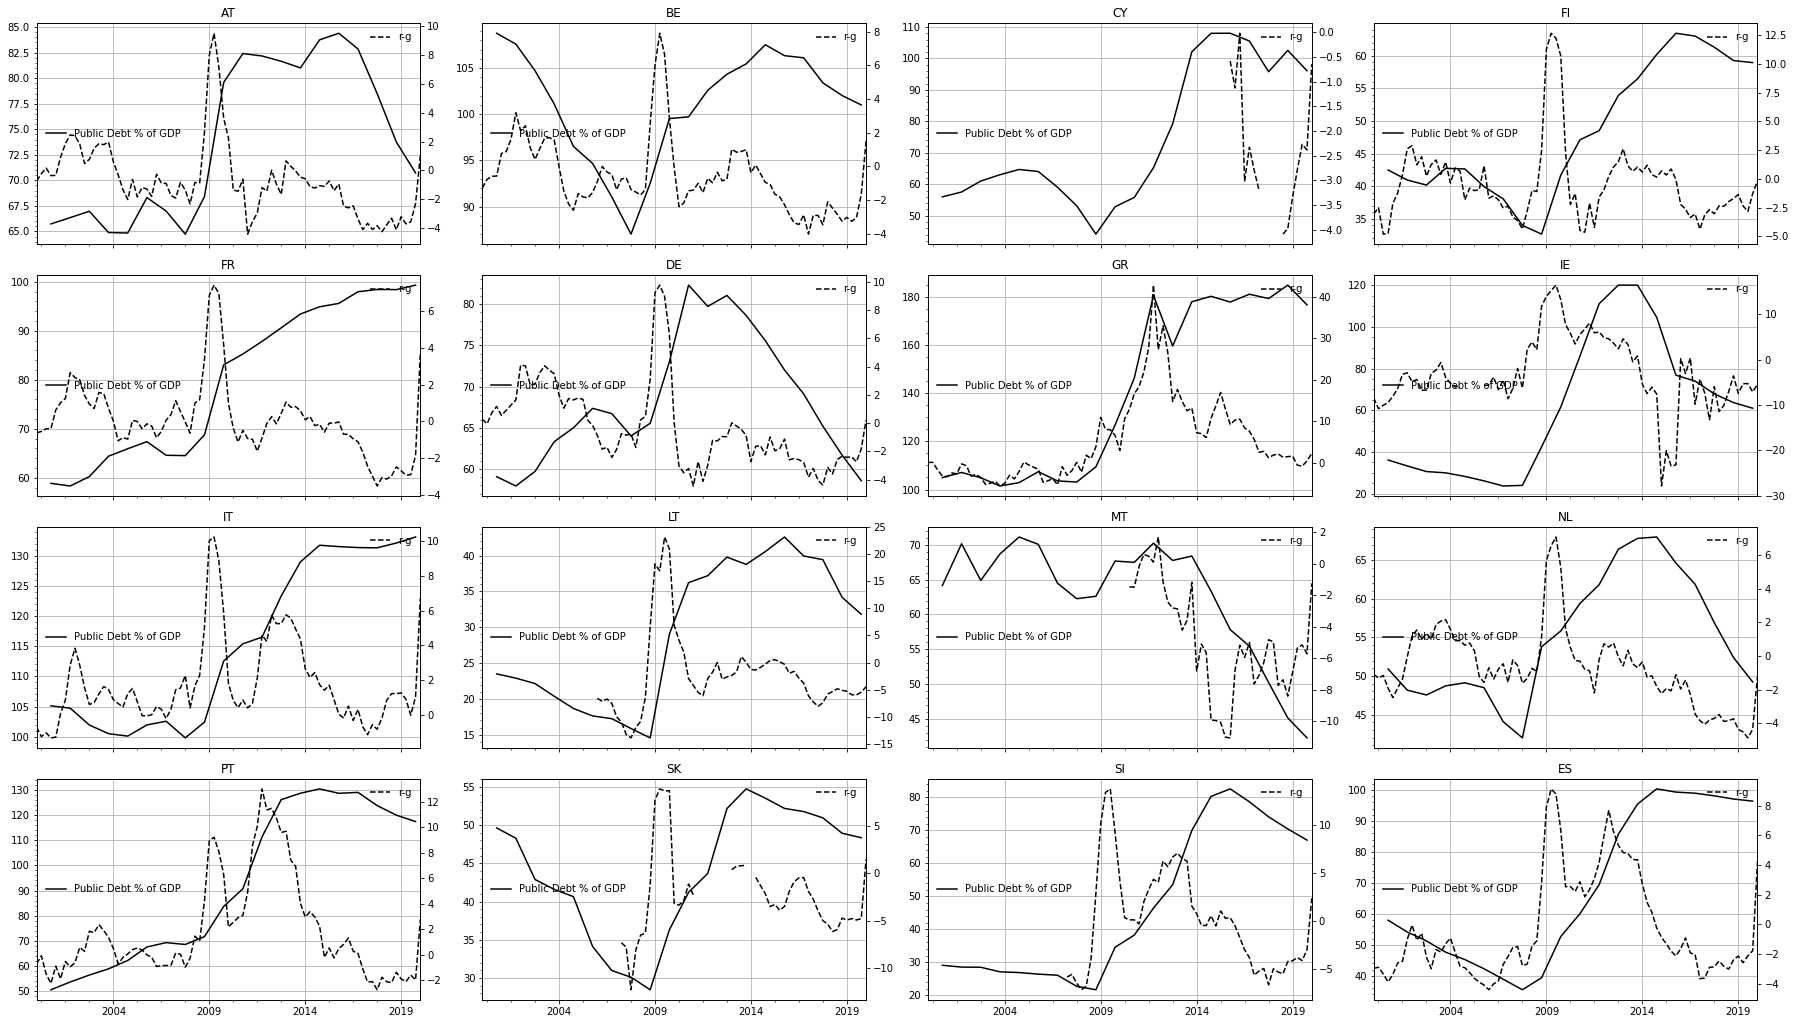

In [21]:
Figure_1c()

In [22]:
print('primary balance in euros')
# primary net lending/borrowing, WEO
Blist = (  'aATWOGGXOA','aBEWOGGXOA','aCYWOGGXOA','aFIWOGGXOA','aFRWOGGXOA',
           'aDEWOGGXOA','aGRWOGGXOA','aIEWOGGXOA','aITWOGGXOA','aLTWOGGXOA',
           'aMTWOGGXOA','aNLWOGGXOA','aPTWOGGXOA','aSKWOGGXOA','aSIWOGGXOA',
           'aESWOGGXOA')
B = pd.DataFrame()
for i in Blist:
    dat = ek.get_timeseries([i], fields="VALUE", start_date = "2000", end_date = "2020", interval="yearly")
    dat.rename(columns={'VALUE':i[1:3]},inplace=True)
    B = B.merge(dat, left_index=True, right_index=True, how='outer')
B.index = B.index.to_period('Y')
B.to_csv('_PrimaryBalanceEurosYearly.csv')

primary balance in euros


In [23]:
print('public debt in euros')
# General government debt, WEO
Dlist = (  'aATWOGGDGA','aBEWOGGDGA','aCYWOGGDGA','aFIWOGGDGA','aFRWOGGDGA',
           'aDEWOGGDGA','aGRWOGGDGA','aIEWOGGDGA','aITWOGGDGA','aLTWOGGDGA',
           'aMTWOGGDGA','aNLWOGGDGA','aPTWOGGDGA','aSKWOGGDGA','aSIWOGGDGA',
           'aESWOGGDGA')
D = pd.DataFrame()
for i in Dlist:
    dat = ek.get_timeseries([i], fields="VALUE", start_date = "2000", end_date = "2020", interval="yearly")
    dat.rename(columns={'VALUE':i[1:3]},inplace=True)
    D = D.merge(dat, left_index=True, right_index=True, how='outer')
D.index = D.index.to_period('Y')
D.to_csv('_PublicDebtEurosYearly.csv')

public debt in euros


In [24]:
print('GDP in euros')
# GDP current prices, WEO
Ylist = (  'aATWOGDPA','aBEWOGDPA','aCYWOGDPA','aFIWOGDPA','aFRWOGDPA',
           'aDEWOGDPA','aGRWOGDPA','aIEWOGDPA','aITWOGDPA','aLTWOGDPA',
           'aMTWOGDPA','aNLWOGDPA','aPTWOGDPA','aSKWOGDPA','aSIWOGDPA',
           'aESWOGDPA')
Y = pd.DataFrame()
for i in Ylist:
    dat = ek.get_timeseries([i], fields="VALUE", start_date = "2000", end_date = "2020", interval="yearly")
    dat.rename(columns={'VALUE':i[1:3]},inplace=True)
    Y = Y.merge(dat, left_index=True, right_index=True, how='outer')
Y.index = Y.index.to_period('Y')
Y.to_csv('_GDPEurosYearly.csv')

GDP in euros


In [25]:
ezCoreB = B[['FR','DE','BE','NL']].copy()
ezCoreB['B'] = ezCoreB['FR'] + ezCoreB['DE'] + ezCoreB['BE'] + ezCoreB['NL']

ezPeriB = B[['GR','IE','IT','PT','ES']].copy()
ezPeriB['B'] = ezPeriB[list(ezPeriB.columns)].sum(axis=1)

ezCoreY = Y[['FR','DE','BE','NL']].copy()
ezCoreY['Y'] = ezCoreY['FR'] + ezCoreY['DE'] + ezCoreY['BE'] + ezCoreY['NL']

ezPeriY = Y[['GR','IE','IT','PT','ES']].copy()
ezPeriY['Y'] = ezPeriY[list(ezPeriY.columns)].sum(axis=1)

ezCoreD = D[['FR','DE','BE','NL']].copy()
ezCoreD['D'] = ezCoreD['FR'] + ezCoreD['DE'] + ezCoreD['BE'] + ezCoreD['NL']

ezPeriD = D[['GR','IE','IT','PT','ES']].copy()
ezPeriD['D'] = ezPeriD[list(ezPeriD.columns)].sum(axis=1)

ezCoreDY = pd.concat([ezCoreD['D'], ezCoreY['Y']], axis=1, sort=True)
ezCoreDY['DY'] = ezCoreDY['D']/ezCoreDY['Y']
ezCoreDY = ezCoreDY[['DY']].reset_index()

ezPeriDY = pd.concat([ezPeriD['D'], ezPeriY['Y']], axis=1, sort=True)
ezPeriDY['DY'] = ezPeriDY['D']/ezPeriDY['Y']
ezPeriDY = ezPeriDY[['DY']].reset_index()

ezCoreBY = pd.concat([ezCoreB['B'], ezCoreY['Y']], axis=1, sort=True)
ezCoreBY['BY'] = ezCoreBY['B']/ezCoreBY['Y']
ezCoreBY = ezCoreBY[['BY']].reset_index()

ezPeriBY = pd.concat([ezPeriB['B'], ezPeriY['Y']], axis=1, sort=True)
ezPeriBY['BY'] = ezPeriBY['B']/ezPeriBY['Y']
ezPeriBY = ezPeriBY[['BY']].reset_index()

ezPeriBY.head()

,Date,BY
0,2000,0.028108
1,2001,0.019043
2,2002,0.016714
3,2003,0.010224
4,2004,0.006723


In [26]:
RG = rg.copy()
RG['year'] = RG.index.year
RG = RG.groupby('year').resample('Y')[list(rg.columns)].mean()
#RG.set_index('year')
#RG = RG.drop(['US', 'year'], axis=1)
RG.head()

,,AT,BE,CY,FI,FR,DE,GR,IE,IT,LT,MT,NL,PT,SK,SI,ES,US
year,Date,,,,,,,,,,,,,,,,,
2000,2000,-0.294121,-0.815561,NaN,-3.781734,-0.488181,0.543496,-1.245987,-9.698439,-1.074832,NaN,NaN,-1.370568,-1.162738,NaN,NaN,-3.267798,5.737100
2001,2001,1.219163,1.610250,NaN,-0.096713,1.379946,1.099131,-2.242719,-5.161578,0.629442,NaN,NaN,-1.453651,-1.081842,NaN,NaN,-2.367532,4.970375
2002,2002,1.368781,1.501685,NaN,1.564769,1.746981,3.405068,-2.631188,-5.680059,2.213141,NaN,NaN,1.258130,0.499874,NaN,NaN,-0.982029,4.408250
2003,2003,1.785372,1.492222,NaN,1.187215,1.121025,3.716861,-5.112753,-2.480342,1.253996,NaN,NaN,1.766728,1.825245,NaN,NaN,-1.963952,3.877359
2004,2004,-0.763030,-1.591273,NaN,-0.146696,-0.715269,1.608678,-3.544507,-5.665297,0.801884,NaN,NaN,1.003950,-0.108436,NaN,NaN,-2.138674,4.191025


In [27]:
ezCoreYwgt = ezCoreY.div(ezCoreY.Y, axis='index')
ezCoreYwgt = ezCoreYwgt.drop(['Y'], axis=1)
ezCoreYwgt.head()

ezPeriYwgt = ezPeriY.div(ezPeriY.Y, axis='index')
ezPeriYwgt = ezPeriYwgt.drop(['Y'], axis=1)
ezPeriYwgt.head()

,GR,IE,IT,PT,ES
Date,,,,,
2000,0.062401,0.047877,0.547488,0.056731,0.285503
2001,0.063195,0.050630,0.539334,0.056377,0.290463
2002,0.064430,0.053586,0.530457,0.056189,0.295339
2003,0.067139,0.054622,0.521900,0.054816,0.301524
2004,0.068892,0.055529,0.515085,0.054144,0.306349


In [28]:
ezCoreRG = RG[['FR','DE','BE','NL']].copy()
ezCoreRGYwgt = ezCoreRG*ezCoreYwgt
ezCoreRGYwgt['RGYwgt'] = ezCoreRGYwgt.sum(axis=1)
ezCoreRGYwgt = ezCoreRGYwgt.reset_index()
ezCoreRGYwgt = ezCoreRGYwgt[['Date','RGYwgt']]

ezPeriRG = RG[['GR','IE','IT','PT','ES']].copy()
ezPeriRGYwgt = ezPeriRG*ezPeriYwgt
ezPeriRGYwgt['RGYwgt'] = ezPeriRGYwgt.sum(axis=1)
ezPeriRGYwgt = ezPeriRGYwgt.reset_index()
ezPeriRGYwgt = ezPeriRGYwgt[['Date','RGYwgt']]
ezPeriRGYwgt.head()

,Date,RGYwgt
0,2000,-2.129473
1,2001,-0.812253
2,2002,0.438137
3,2003,-0.316411
4,2004,-0.806791


In [29]:
ezCore = pd.merge(ezCoreDY, ezCoreRGYwgt, how='left', on=['Date']).set_index('Date')
ezCore = pd.merge(ezCore, ezCoreBY, how='left', on=['Date']).set_index('Date')

ezPeri = pd.merge(ezPeriDY, ezPeriRGYwgt, how='left', on=['Date']).set_index('Date')
ezPeri = pd.merge(ezPeri, ezPeriBY, how='left', on=['Date']).set_index('Date')

ezPeri.head()

,DY,RGYwgt,BY
Date,,,
2000,0.852280,-2.129473,0.028108
2001,0.836781,-0.812253,0.019043
2002,0.807631,0.438137,0.016714
2003,0.784720,-0.316411,0.010224
2004,0.774332,-0.806791,0.006723


In [30]:
bw = ezCore[['BY']].copy()
bw['Peri'] = ezPeri[['BY']]
bw.columns = ['Core','GIIPS']

dw = ezCore[['DY']].copy()
dw['Peri'] = ezPeri[['DY']]
dw.columns = ['Core','GIIPS']

rgw = ezCore[['RGYwgt']].copy()
rgw['Peri'] = ezPeri[['RGYwgt']]
rgw.columns = ['Core','GIIPS']

rgw.head()

,Core,GIIPS
Date,,
2000,-0.094381,-2.129473
2001,0.950572,-0.812253
2002,2.477387,0.438137
2003,2.452921,-0.316411
2004,0.516605,-0.806791


In [31]:
print('Plot debt and r - g by group')
def Figure_1d():
    clist = ('Core','GIIPS')
    Figure_1d, axes = plt.subplots(nrows=1, ncols=2, sharex = True, sharey=True,figsize=(25,15))
    j = 1
    while j <= 2:
        for i in clist:
            axes = plt.subplot(1,2,j)
            axes.set_title(i,fontsize=20)
            dw.plot(y=i,ax=axes,c='k',linestyle='-',label='Public Debt/GDP',fontsize=15)
            axes.legend(frameon=False,loc='center left',fontsize=20)
            axes.set_ylim([0.4,1.3])
            rgw.plot(y=i, ax=axes.twinx(),c='k',linestyle='--',label='r-g',fontsize=15)
            plt.gca().set_ylim([-4,9])
            axes.minorticks_on()
            axes.grid(which='major')
            plt.legend(frameon=False,loc='top right',fontsize=20)
            axes.set_xlabel('')
            j += 1
    #txt = ('Note: WEO, Thomson Reuters Refinitiv (Eikon API). \
           #Core: Belgium, France, Germany, Netherlands; \
           #GIIPS: Greece, Ireland, Italy, Portugal, Spain')
    #Figure_1d.text(.5, -.05, txt, ha='center',fontsize=20)
    Figure_1d.tight_layout()
    Figure_1d.subplots_adjust(top=0.93)
    #Figure_1d.suptitle('Figure 1d. Public Debt, r-g: Eurozone Core and GIIPS',fontsize=25)
    plt.savefig('Figure_1d.png', format='png')
    plt.show()

Plot debt and r - g by group


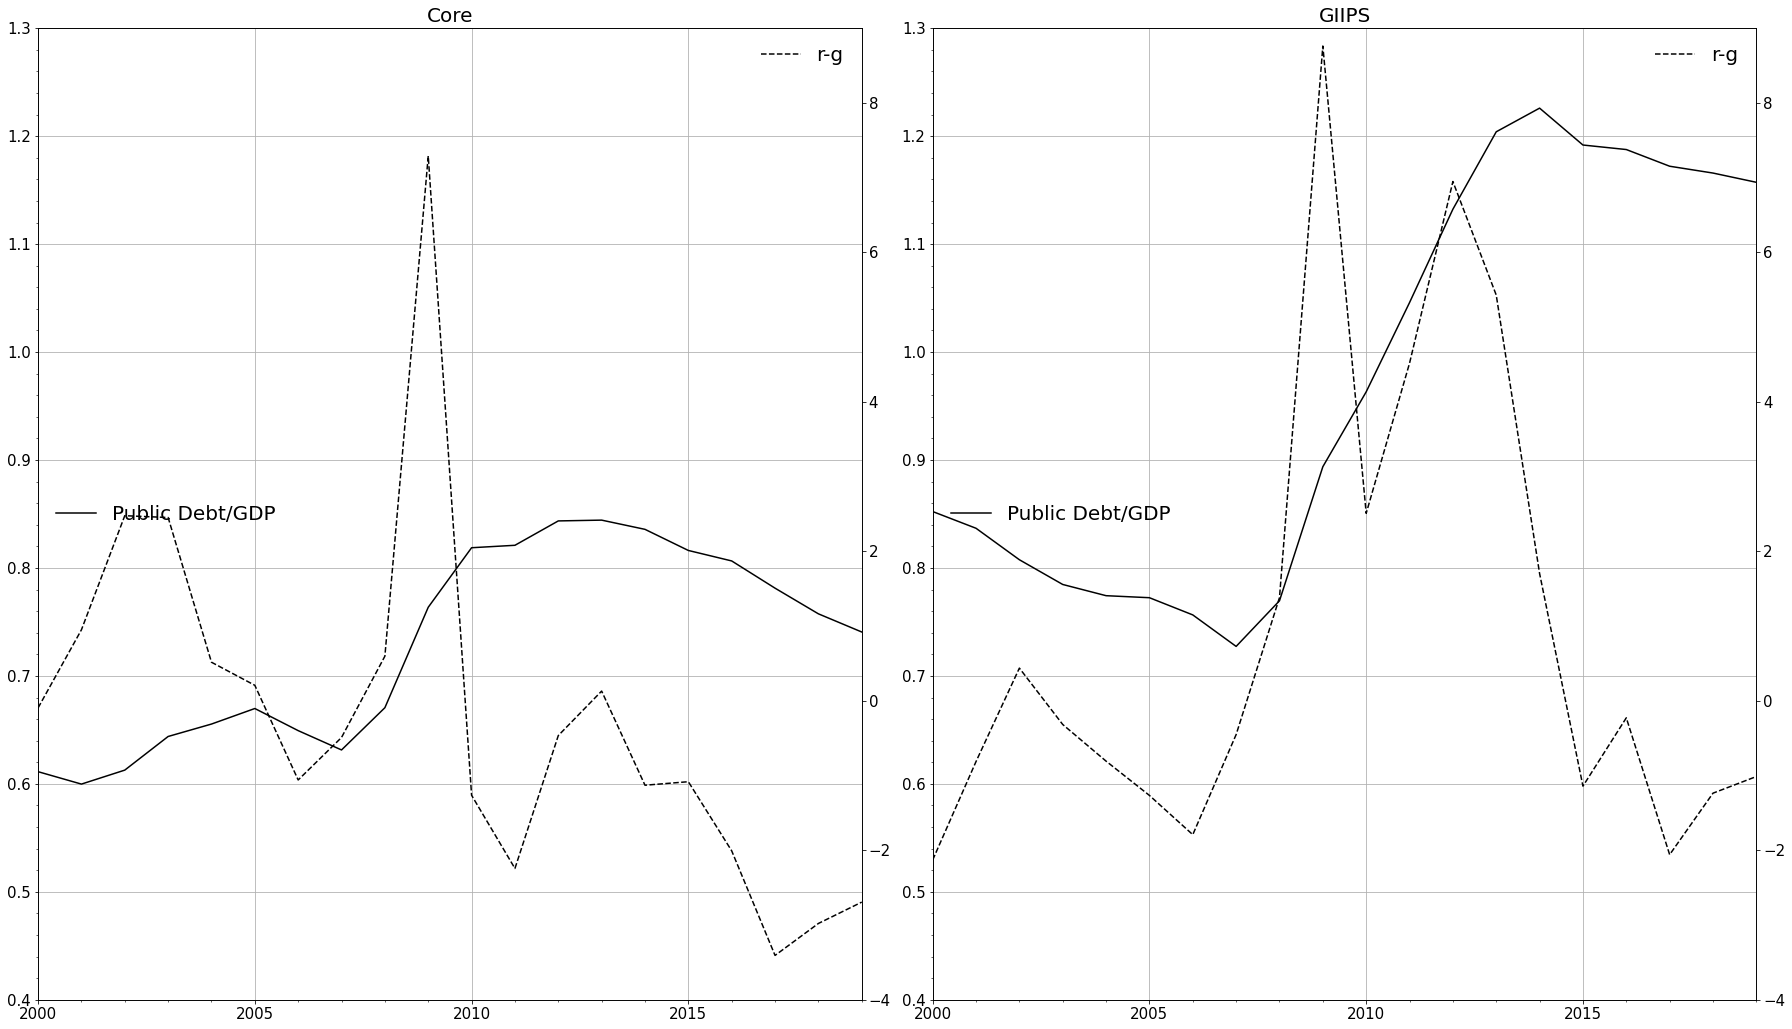

In [32]:
Figure_1d()

In [33]:
drgw = pd.DataFrame()
drgw['Core'] = dw['Core']*rgw['Core']
drgw['GIIPS'] = dw['GIIPS']*rgw['GIIPS']
drgw.head()

,Core,GIIPS
Date,,
2000,-0.057695,-1.814907
2001,0.570160,-0.679678
2002,1.518033,0.353853
2003,1.579469,-0.248294
2004,0.338596,-0.624724


In [34]:
print('Plot d/y*(r-g) by group')
def Figure_1e():
    clist = ('Core','GIIPS')
    Figure_1e, axes = plt.subplots(nrows=1, ncols=2, sharex = True, sharey=True,figsize=(25,15))
    j = 1
    while j <= 2:
        for i in clist:
            axes = plt.subplot(1,2,j)
            axes.set_title(i,fontsize=20)
            drgw.plot(y=i,ax=axes,c='k',linestyle='-',label='[Public Debt/GDP]*(r-g)',fontsize=15)
            axes.legend(frameon=False,loc='center left',fontsize=20)
            axes.set_ylim([-3,8])
            bw.plot(y=i, ax=axes.twinx(),c='k',linestyle='--',label='Primary Balance/GDP',fontsize=15)
            plt.gca().set_ylim([-0.06,0.03])
            axes.minorticks_on()
            axes.grid(which='major')
            plt.legend(frameon=False,loc='center right',fontsize=20)
            axes.set_xlabel('')
            j += 1
    #txt = ('Note: WEO, Thomson Reuters Refinitiv (Eikon API). \
           #Core: Belgium, France, Germany, Netherlands; \
           #GIIPS: Greece, Ireland, Italy, Portugal, Spain')
    #Figure_1e.text(.5, -.05, txt, ha='center',fontsize=20)
    Figure_1e.tight_layout()
    Figure_1e.subplots_adjust(top=0.93)
    #Figure_1e.suptitle('Figure 1e. [Public Debt/GDP]*(r-g) and Primary Balance/GDP: Eurozone Core and GIIPS',fontsize=25)
    plt.savefig('Figure_1e.png', format='png')
    plt.show()

Plot d/y*(r-g) by group


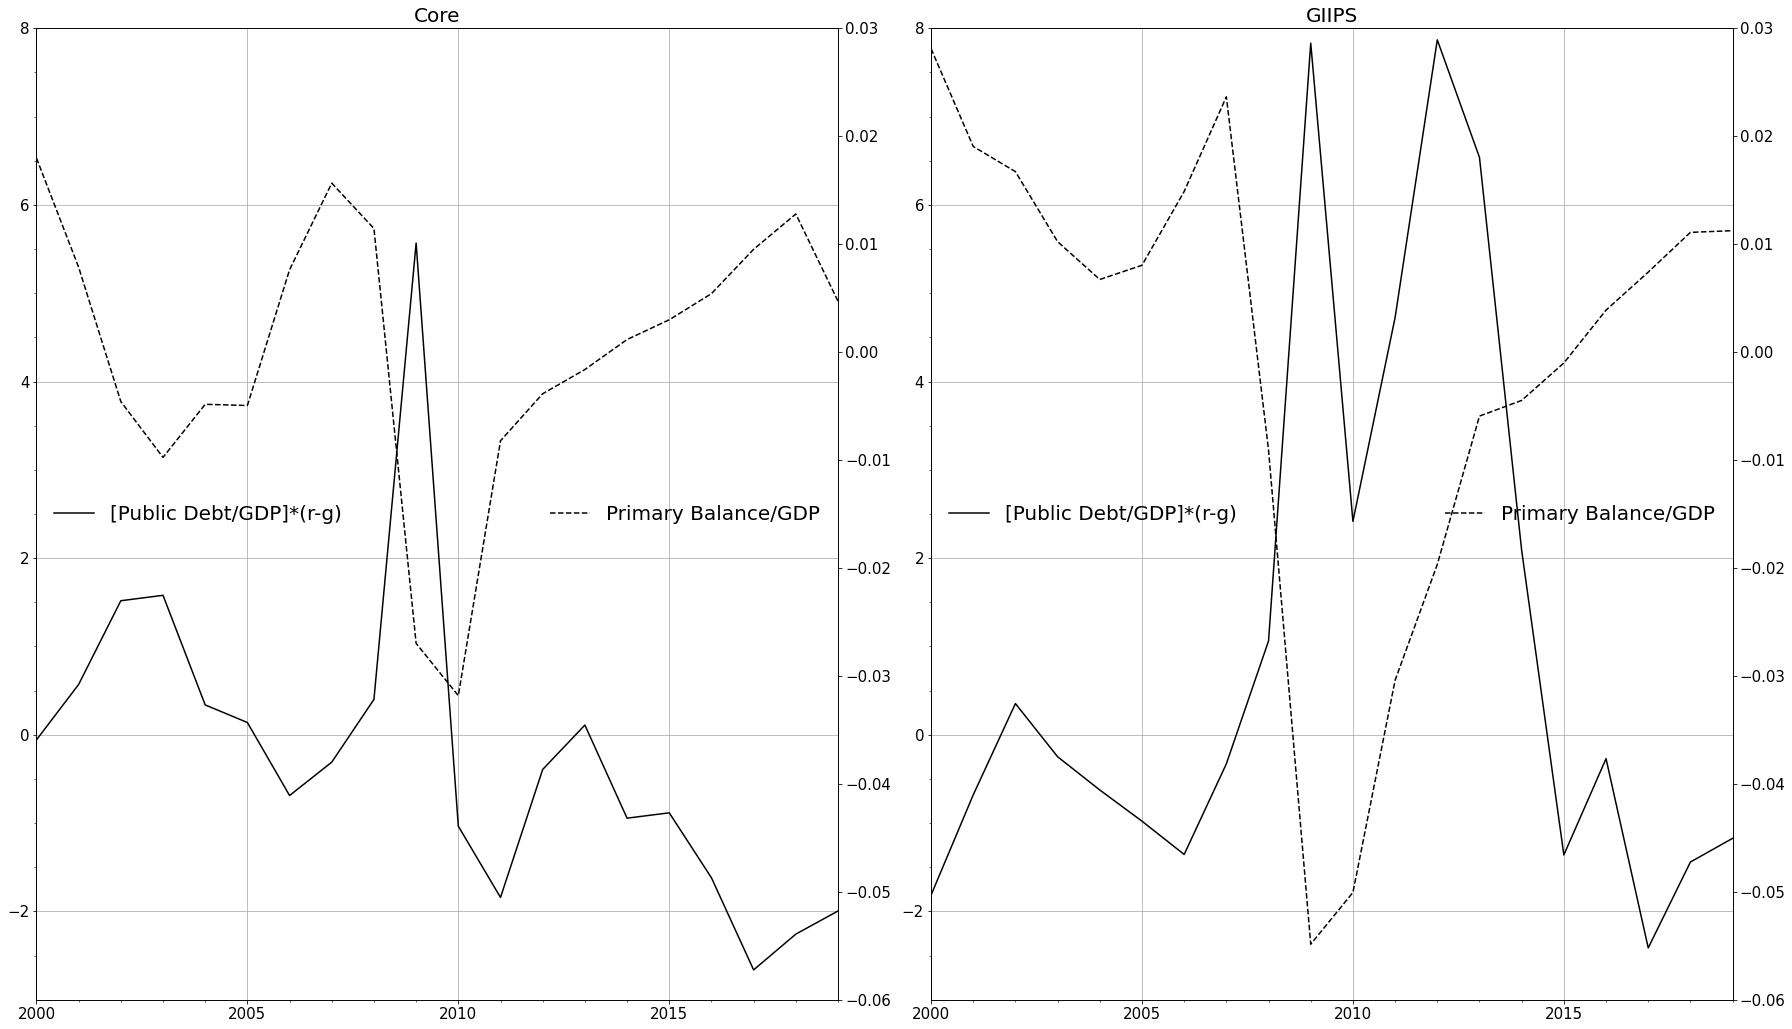

In [35]:
Figure_1e()

In [36]:
print('GDP Forecasts')
# GDP Forecasts, Oxford Economics
flist = ('aATXGDPY','aBEXGDPY','aCYXGDPY','aEEXGDPY',
         'aFIXGDPY','aFRXGDPY','aDEXGDPY','aGRXGDPY',
         'aIEXGDPY','aITXGDPY','aLVXGDPY','aLTXGDPY',
         'aLUXGDPY','aMTXGDPY','aNLXGDPY','aPTXGDPY',
         'aSKXGDPY','aSIXGDPY','aESGDPY/CA')
f = pd.DataFrame()
for i in flist:
    dat = ek.get_timeseries([i], fields="VALUE", start_date = "2019", end_date = "2022", interval="yearly")
    dat.rename(columns={'VALUE':i[1:3]},inplace=True)
    f = f.merge(dat, left_index=True, right_index=True, how='outer')
f.index = f.index.to_period('Y')
f.to_csv('_GDPforecastYearly.csv')

GDP Forecasts


In [37]:
print('Plot GDP Forecasts')
def Figure_1f():
    Figure_1f = plt.figure(figsize=(20,10))
    plt.rc('axes', prop_cycle=c_csm)
    f[['AT','BE','CY','EE','FI','FR','DE','GR','IE','IT','LV','LT','LU','MT','NL','PT','SK','SI','ES']].plot(figsize=(20,10))
    plt.subplots_adjust(top=0.93)
    #plt.suptitle('Figure 1f. GDP Forecasts.',fontsize=25)
    #txt = 'Note: Oxford Economics, INE (Spain); Thomson Reuters Refinitiv (Eikon API).'
    #plt.text(50,-12, txt, ha='center',fontsize=20)
    plt.xlim(['2019', '2021'])
    plt.xlabel('')
    plt.grid()
    plt.savefig('Figure_1f.png', format='png')
    plt.show()

Plot GDP Forecasts


<Figure size 1440x720 with 0 Axes>

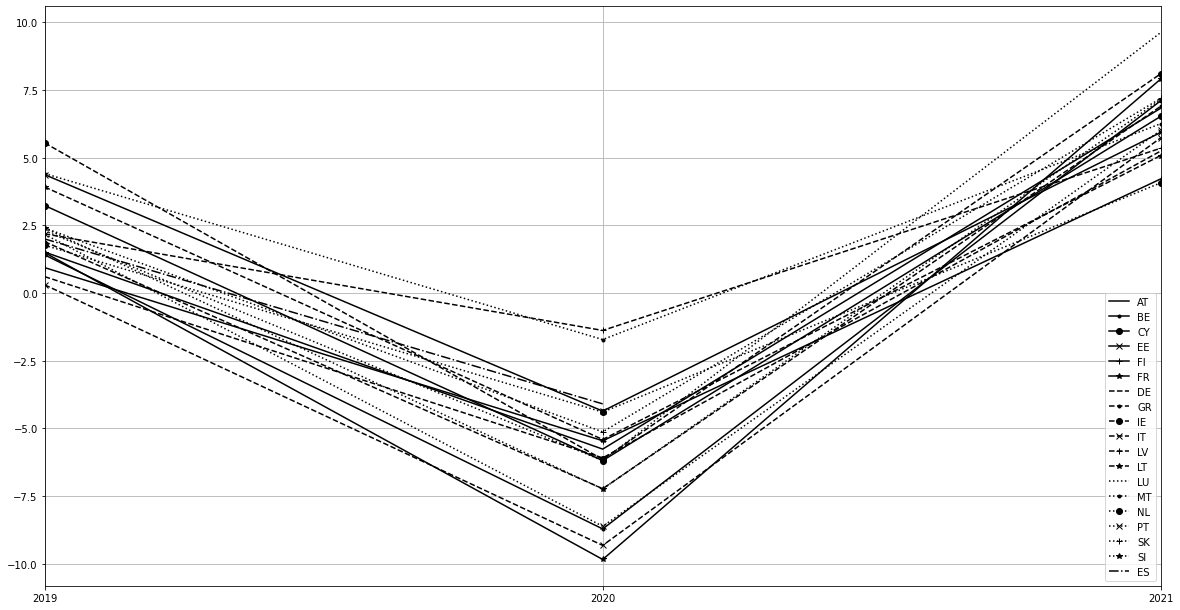

In [38]:
Figure_1f()

## Figure 2

In [39]:
print('ECB and FOMC decisions')
cblist = ('EUECBR=ECI','USFOMC=ECI')
cb = pd.DataFrame()
for i in cblist:
    dat = ek.get_timeseries([i], fields="VALUE", start_date = "2000-01-01", end_date = "2020-06-19", interval="monthly")
    dat.rename(columns={'VALUE':i[2:6]},inplace=True)
    cb = cb.merge(dat, left_index=True, right_index=True, how='outer')
cb.index = cb.index.to_period('M')
cb.to_csv('_ECBrateFOMCdecisions.csv')

ECB and FOMC decisions


In [40]:
print('Plot ECB and Fed decisions')
def Figure_2a():
    
    Figure_2a = plt.figure(figsize=(20,10))
    plt.rc('axes', prop_cycle=c_cms)
    cb[['ECBR','FOMC']].plot(figsize=(20,10))
    plt.subplots_adjust(top=0.93)
    #plt.suptitle('Figure 2a. ECB Rate and FOMC decisions',fontsize=25)
    #txt = 'Note: Monthly data from Thomson Reuters Refinitiv (Eikon API).'
    #plt.text(430,-0.8,txt, ha='center',fontsize=20)
    plt.xlim(['2000Q1', '2020Q2'])
    plt.xlabel('')
    plt.grid()
    plt.savefig('Figure_2a.png', format='png')
    plt.show()

Plot ECB and Fed decisions


<Figure size 1440x720 with 0 Axes>

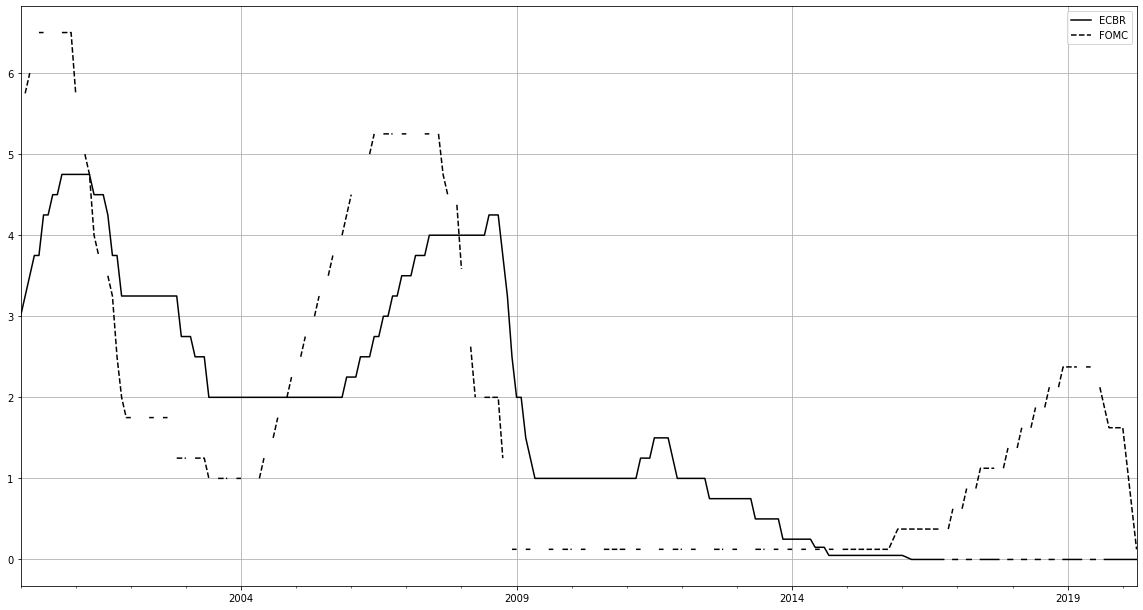

In [41]:
Figure_2a()

In [42]:
url1="https://www.ecb.europa.eu/mopo/pdf/PEPP_public_sector_securities_breakdown_history.csv?c3bd8efbd1e412e82d76b0660264aee1"
r1=requests.get(url1).content
df1=pd.read_csv(io.StringIO(r1.decode('utf-8')), skiprows=2,  skipfooter=54, usecols=range(0,2))
df2=pd.read_csv(io.StringIO(r1.decode('utf-8')), skiprows=29, skipfooter=27, usecols=range(0,2))
df3=pd.read_csv(io.StringIO(r1.decode('utf-8')), skiprows=54, skipfooter=2,  usecols=range(0,2))

In [43]:
df1=df1.set_axis(['Country', 'netP'], axis=1, inplace=False)
df2=df2.set_axis(['Country', 'wamP'], axis=1, inplace=False)
df3=df3.set_axis(['Country', 'wamU'], axis=1, inplace=False)
pepp = pd.merge(df1, df2, how='left')
pepp = pd.merge(pepp, df3, how='left')
pepp

,Country,netP,wamP,wamU
0,Austria,4914,8.93,7.43
1,Belgium,6461,5.41,8.98
2,Cyprus,481,12.36,8.19
3,Germany,46749,3.15,6.59
4,Estonia,0,0.00,NaN
5,Spain,22392,8.28,7.42
6,Finland,3232,8.68,6.63
7,France,23575,8.19,7.16
8,Greece,4690,7.97,9.64
9,Ireland,3000,7.95,8.85


In [44]:
print('Plot PEPP net purchases')
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')
def Figure_2b():
    Figure_2b, ax1 = plt.subplots()
    Figure_2b.set_size_inches(15, 15)
    ax1.pie(pepp.netP, labels=pepp.Country, autopct='%1.1f%%',shadow=False, startangle=90)
    ax1.axis('equal')     
    plt.subplots_adjust(top=1)
    #plt.suptitle('Figure 2b. Pandemic Emergency Purchase Programme: Net Purchases March-May 2020',fontsize=20)
    #txt = 'Note: Based on ECB statistics (https://www.ecb.europa.eu/mopo/implement/pepp/html/index.en.html)'
    #plt.text(-0.25,-1.25,txt, ha='center',fontsize=15)
    plt.savefig('Figure_2b.png', format='png')
    plt.show()

Plot PEPP net purchases


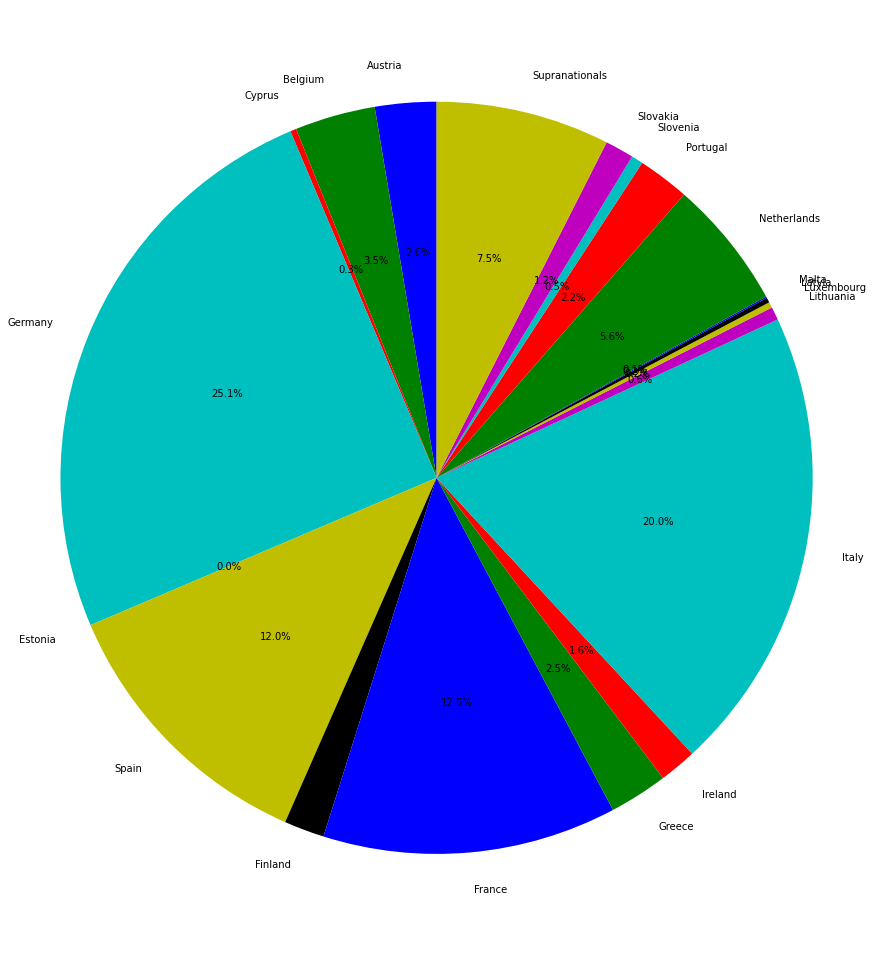

In [45]:
Figure_2b()

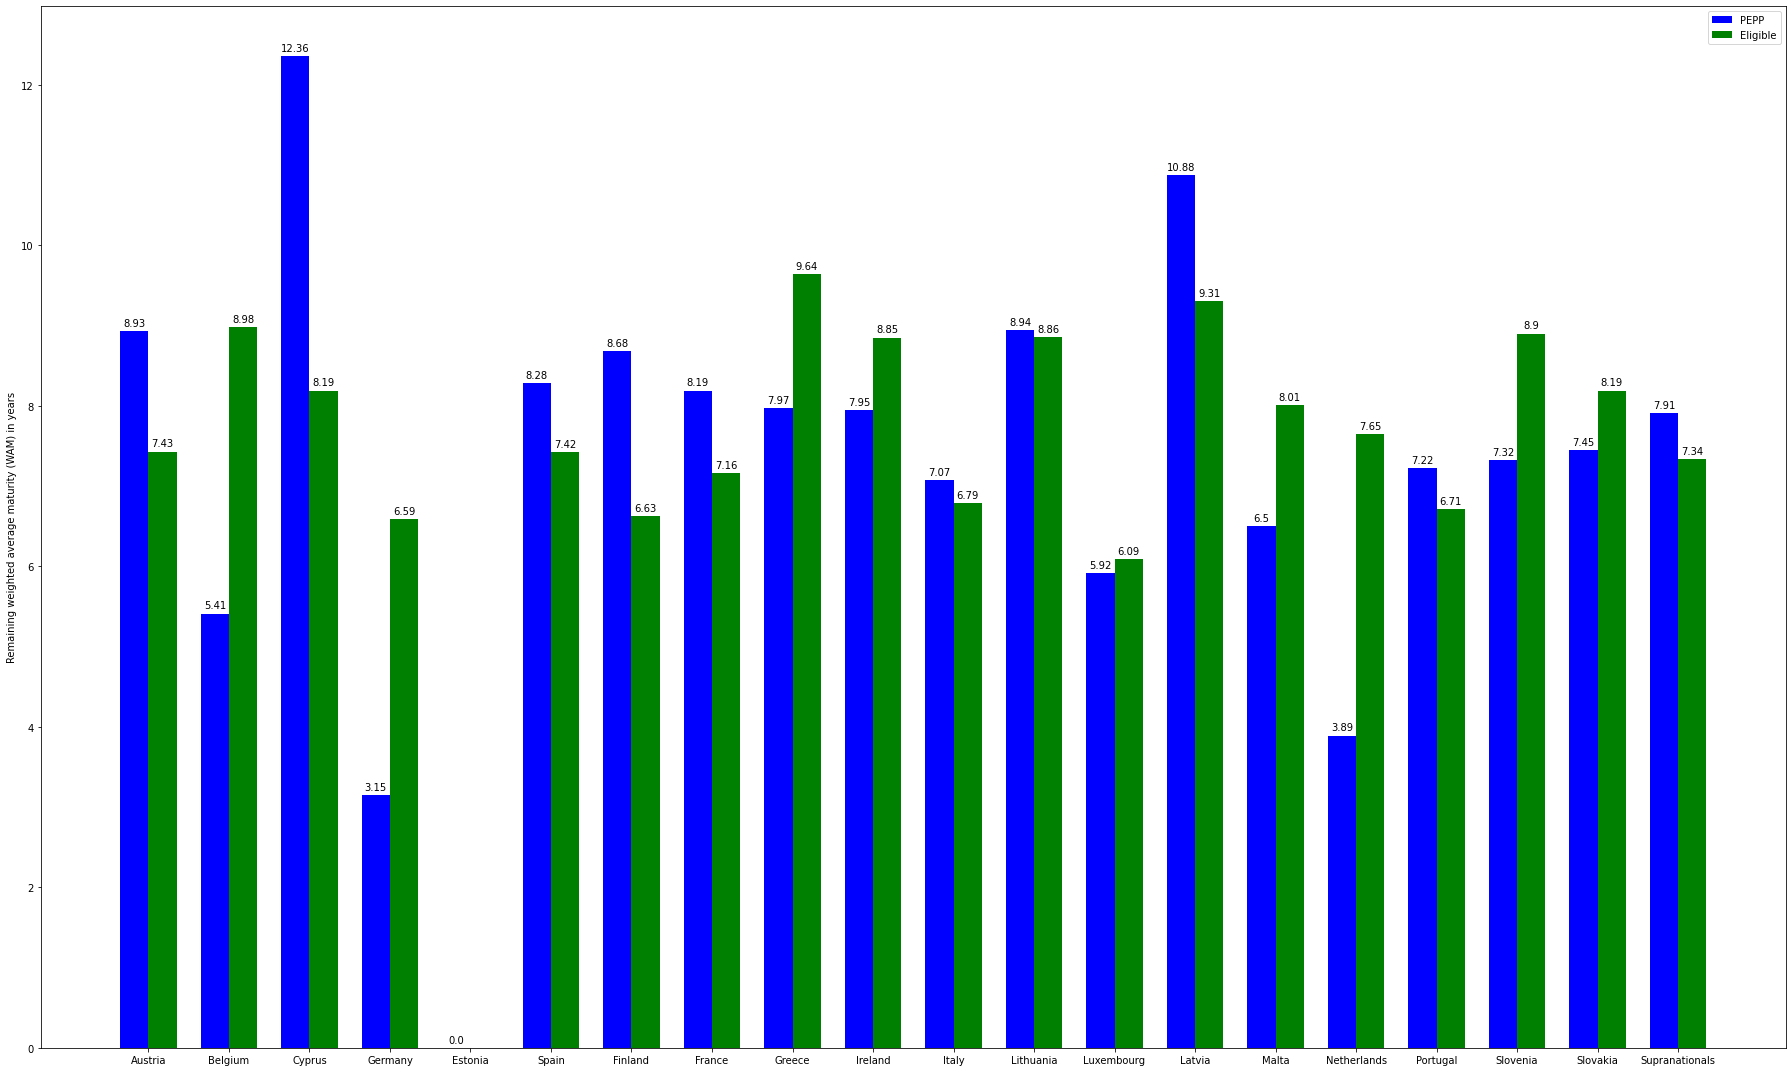

In [46]:
labels = pepp.Country
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
rects1 = ax.bar(x - width/2, pepp.wamP, width, label='PEPP')
rects2 = ax.bar(x + width/2, pepp.wamU, width, label='Eligible')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Remaining weighted average maturity (WAM) in years')
#ax.set_title('Figure 2c. Remaining weighted average maturity (WAM) in years of public sector securities holdings under ECB-PEPP'
             #, fontsize = 25)
#txt = 'Note: Based on ECB statistics (https://www.ecb.europa.eu/mopo/implement/pepp/html/index.en.html)'
#plt.text(4,-.5,txt, ha='center',fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig('Figure_2c.png', format='png')
plt.show()

## Figure 3

In [47]:
print('REER')
# Real broad effective exchange rate index, 2010=100, BIS
elist = (  'aATBISRXBR','aBEBISRXBR','aCYBISRXBR','aFIBISRXBR','aFRBISRXBR',
           'aDEBISRXBR','aGRBISRXBR','aIEBISRXBR','aITBISRXBR','aLTBISRXBR',
           'aMTBISRXBR','aNLBISRXBR','aPTBISRXBR','aSKBISRXBR','aSIBISRXBR',
           'aESBISRXBR','aEEBISRXBR','aLVBISRXBR','aLUBISRXBR')
e = pd.DataFrame()
for i in elist:
    dat = ek.get_timeseries([i], fields="VALUE", start_date = "2000", end_date = "2020", interval="monthly")
    dat.rename(columns={'VALUE':i[1:3]},inplace=True)
    e = e.merge(dat, left_index=True, right_index=True, how='outer')
e.index = e.index.to_period('M')
e.to_csv('_REERMonthly.csv')

REER


In [48]:
print('Plot REER')
def Figure_3a():
    Figure_3a = plt.figure(figsize=(20,10))
    plt.rc('axes', prop_cycle=c_cms)
    e[['AT','BE','CY','EE','FI','FR','DE','GR','IE','IT','LT','LV','LU','MT','NL','PT','SK','SI','ES']].plot(figsize=(20,10))
    plt.subplots_adjust(top=0.93)
    #plt.suptitle('Figure 3a. Real broad effective exchange rate index (2010=100)',fontsize=25)
    #txt = 'Note: Monthly data from BIS; Thomson Reuters Refinitiv (Eikon API).'
    #plt.text(440,50,txt, ha='center',fontsize=20)
    plt.xlim(['2000', '2020'])
    plt.xlabel('')
    plt.grid()
    plt.savefig('Figure_3a.png', format='png')
    plt.show()

Plot REER


<Figure size 1440x720 with 0 Axes>

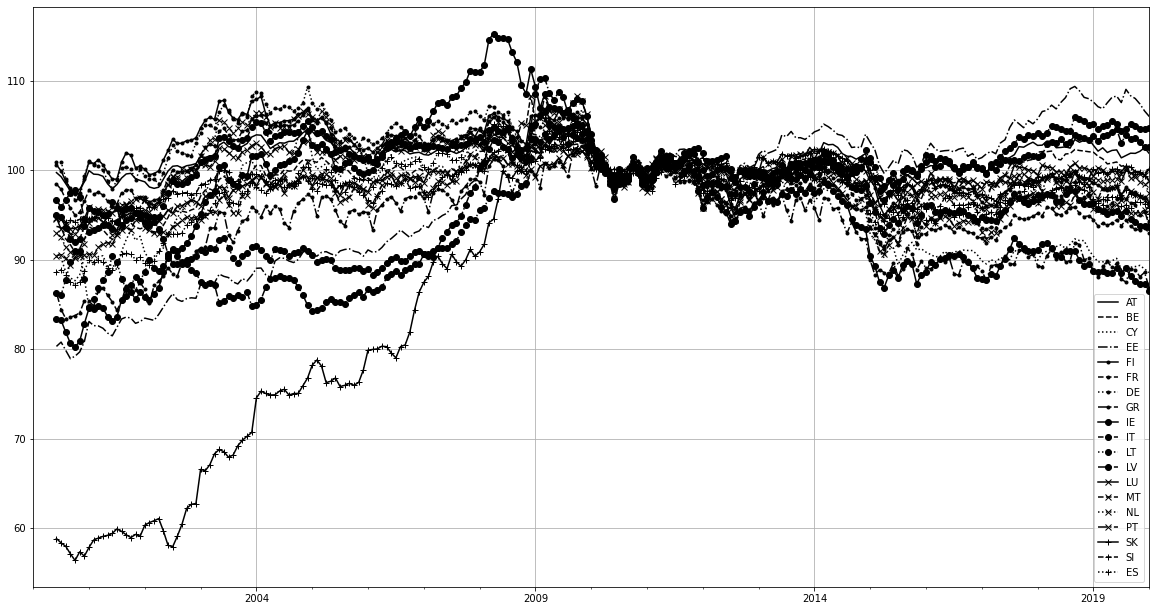

In [49]:
Figure_3a()

In [50]:
print('CAB')
# Current account balance % of GDP, WEO
clist = (  'aATWOBCAR','aBEWOBCAR','aCYWOBCAR','aFIWOBCAR','aFRWOBCAR',
           'aDEWOBCAR','aGRWOBCAR','aIEWOBCAR','aITWOBCAR','aLTWOBCAR',
           'aMTWOBCAR','aNLWOBCAR','aPTWOBCAR','aSKWOBCAR','aSIWOBCAR',
           'aESWOBCAR','aEEWOBCAR','aLVWOBCAR','aLUWOBCAR')
c = pd.DataFrame()
for i in clist:
    dat = ek.get_timeseries([i], fields="VALUE", start_date = "2000", end_date = "2020", interval="yearly")
    dat.rename(columns={'VALUE':i[1:3]},inplace=True)
    c = c.merge(dat, left_index=True, right_index=True, how='outer')
c.index = c.index.to_period('M')
c.to_csv('_CurrentAccountGDPYearly.csv')

CAB


In [51]:
print('Plot CAB')
def Figure_3b():
    Figure_3b = plt.figure(figsize=(20,10))
    plt.rc('axes', prop_cycle=c_csm)
    c[['AT','BE','CY','EE','FI','FR','DE','GR','IE','IT','LT','LV','LU','MT','NL','PT','SK','SI','ES']].plot(figsize=(20,10))
    plt.subplots_adjust(top=0.93)
    #plt.suptitle('Figure 3b. Current Account Balance % of GDP',fontsize=25)
    #txt = 'Note: WEO; Thomson Reuters Refinitiv (Eikon API).'
    #plt.text(415,-25,txt, ha='center',fontsize=20)
    plt.xlim(['2000', '2020'])
    plt.xlabel('')
    plt.grid()
    plt.savefig('Figure_3b.png', format='png')
    plt.show()

Plot CAB


<Figure size 1440x720 with 0 Axes>

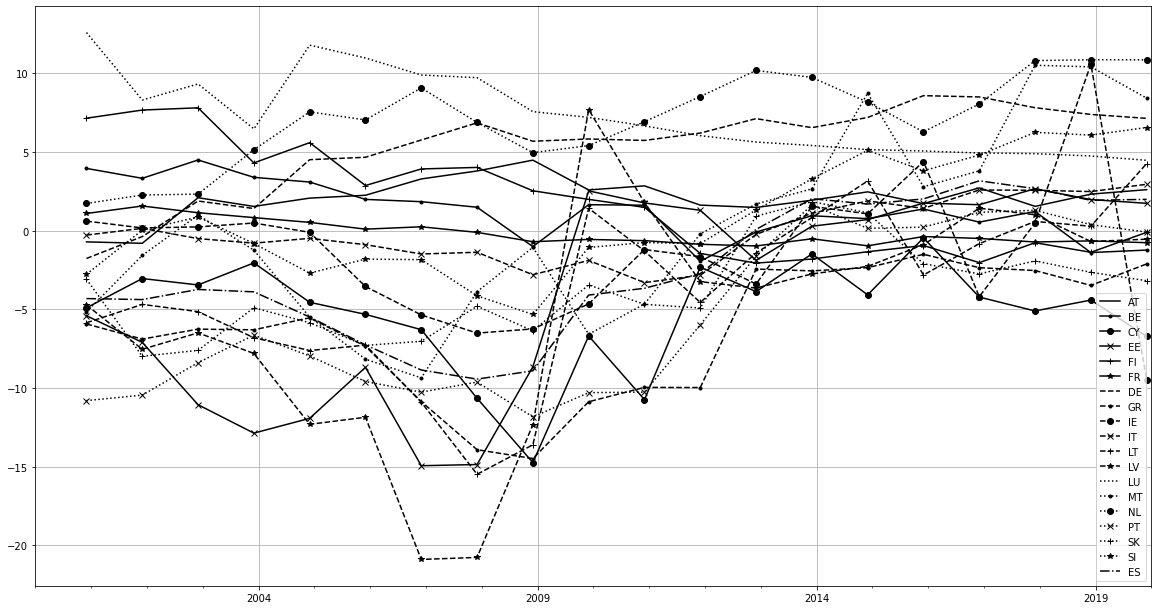

In [52]:
Figure_3b()

In [53]:
print('Composite Leading Indicators')
# Composite Leading Indicators, OECD
mlist = (  'aATCLEAD','aBECLEAD','aFICLEAD','aFRCLEAD',
           'aDECLEAD','aIECLEAD','aITCLEAD',
           'aNLCLEAD','aPTCLEAD',
           'aESCLEAD','aEECLEAD','aLUCLEAD')
m = pd.DataFrame()
for i in mlist:
    dat = ek.get_timeseries([i], fields="CLOSE", start_date = "2000", end_date = "2020", interval="monthly")
    dat.rename(columns={'CLOSE':i[1:3]},inplace=True)
    m = m.merge(dat, left_index=True, right_index=True, how='outer')
m.index = m.index.to_period('M')
m.to_csv('_CompositeLeadingIndicatorsMonthly.csv')

Composite Leading Indicators


In [54]:
print('Plot Composite Leading Indicators')
def Figure_3c():
    Figure_3c = plt.figure(figsize=(20,10))
    plt.rc('axes', prop_cycle=c_csm)
    c[['AT','BE','EE','FI','FR','DE','IE','LU','NL','PT','ES']].plot(figsize=(20,10))
    plt.subplots_adjust(top=0.93)
    #plt.suptitle('Figure 3c. Composite Leading Indicators in Business Cycles',fontsize=25)
    #txt = 'Note: OECD Main Economic Indicators CLI, Thomson Reuters Refinitiv (Eikon API).'
    #plt.text(450,-18,txt, ha='center',fontsize=20)
    plt.xlim(['2000', '2020'])
    plt.xlabel('')
    plt.grid()
    plt.savefig('Figure_3c.png', format='png')
    plt.show()

Plot Composite Leading Indicators


<Figure size 1440x720 with 0 Axes>

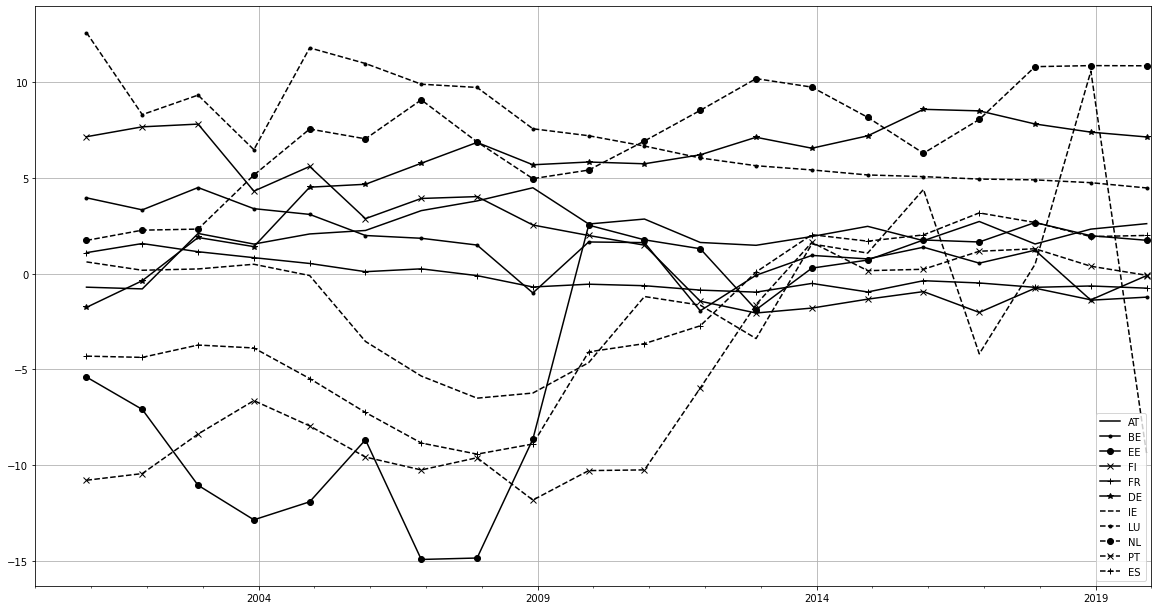

In [55]:
Figure_3c()